# Decision Tree Modelling Iris dataset

In this Machine Learning example Scikit-learn library is used to develop machine learning model for classification problem. Here we will be implementing a simple decision tree model to classify iris plants into three species using the lengths and widths of their petals and sepals, a [classic data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) in the machine learning community. 

The iris samples in question fall into three species: *Iris setosa*, *Iris versicolor*, and *Iris virginica*.  At first glance, the three species can look remarkably like each other, and this is especially the case for the latter two.  However, thanks to the careful measurements taken and presented by Anderson and Fisher, an individual sample may be classified with a high degree of accuracy via machine learning models if the relevant measurements are taken.

##### Problem definition:
Develop predictive Machine Learning model to predict (classify) Iris specirs based on four measured features: petal length,  sepal length, petal with and sepal petal. 
(See below picture to know what these represent)

## Machine Learning model

The decision tree models are the simplest form of tree-based models, and are arguably the simplest form of supervised multivariate classification models. A series of logical tests (generally in the form of boolean comparisons) are applied to the sample entries and their resulting subsets in turn to arrive at a final decision. It is very easy to visualize the decision process in a simple flowchart to trace the rational of every assignment made by a decision tree model, making it among the most interpretable of models. The are called 'white box'type of models. 

## Scikit-learn
We will be using the **Scikit-learn library** for the machine Learning example [sklearn](https://scikit-learn.org). It is the most comprehensive library of Machine Learning algoritms. It is simple and efficient library for predictive data analysis, accessible to everybody (Open Source), and reusable in various contexts, not only for scientific work. It built on NumPy, Pandas, SciPy, and matplotlib essential libraries. 

The following code, strongly derived from [scikit-learn's documentation](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html), shows how a simple decision tree model may be applied and visualized.

## Model performance

First we, have to compare the model predicted values with the validation / testing values. These provide us comparison if our model classification result is correct or made a mistake. Typically we plot it in a confusion matrix. Given an samples for two classification categories, we can refer to samples as positive or negative (two
classes). 

TODO: view simple figure. 

As you can see it compares the actruall classes in our validation / test set with the model prediction. Green means correct, red is flase. Let's suppose an example of binary classification, only two classes.  We evaluate if the classification element was True Positive, True Negative, False Positive and False Negative. 

**True Positives** (TP) - These are the **correctly predicted positive values** which means that the value of actual class is yes and the value of predicted class is also yes.

**True Negatives** (TN) - These are the **correctly predicted negative values** which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

**False positives** and false negatives, these values occur **when your actual class contradicts with the predicted class**.

**False Positives** (FP) – When **actual class is no and predicted class is yes**. 

**False Negatives** (FN) – When **actual class is yes but predicted class in no**. 

---

**Accuracy** (Overall Accuracy) is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. 

$$ Accuracy = \frac{TP+TN}{TP+FP+FN+TN} $$

**Precision** - Precision is the **ratio of correctly predicted positive observations to the total predicted positive observations**. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. 

$$ Precision = \frac{TP}{TP+FP} $$

**Recall (Sensitivity)** is the **ratio of correctly predicted positive observations to the all observations in actual class - yes**. Example: the question recall answers is: Of all the passengers that truly survived the landslide, how many did we label? 

$$ Recall = \frac{TP}{TP+FN} $$

**F1 Score** is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 

$$ F1 Score = 2 \frac{precision \cdot recall}{precision + recall}$$

TODO: Maleki et al. 2020 (CC Figure)
The left rectangle represents positive samples, and the right rectangle represents negative samples. The
circle contains all samples predicted as positive. Given the model predictions, each sample can be considered as TP
(true positive), TN (true negative), FP (false positive), or FN (false negative).


**Let's start coding**

### 1. Python packages imports 

In [79]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Jupyter notebook visualization 
%matplotlib inline
import seaborn as sns
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

# Machine Learning 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

### 2. Data 
The iris dataset can be easily downloaded from Seaborn package

In [2]:
# creating DataFrame called df
df = sns.load_dataset('iris') 

We can check the the data header by pandas method .head()

In [3]:
# view header of the data set
pass

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- What are the available variables describing the Iris flowers?

-  How many?

- Which of the columns represent the target variable? 

- What is the data type of the target?

### 3. Exploratory Data Analysis (EDA)

Get basic info about the dataset with `.info()` method.

In [4]:
# do yourself 
pass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Are the missing data for any record? 

Use `.isnull().any()` method

In [5]:
# do yourself - check missing data records? 
pass

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

What is the dataset dimensionality?

Use `.shape` method. The same as NumPy uses. See there is not a bracket here. Eghh :-( 

In [6]:
# do yourself - check data set dimensionality
df.shape

(150, 5)

In [ ]:
# See what the variables mean! 

<img src="iris-dataset.png" style="height:500px"> 


Nest, let's explore the dataset in the feature space.

Use `Seaborn` method `.pairplot()`. Pass df as data parameter and select 'species' attribute for colloring the pair plots. 

    data=df

    hue='species'

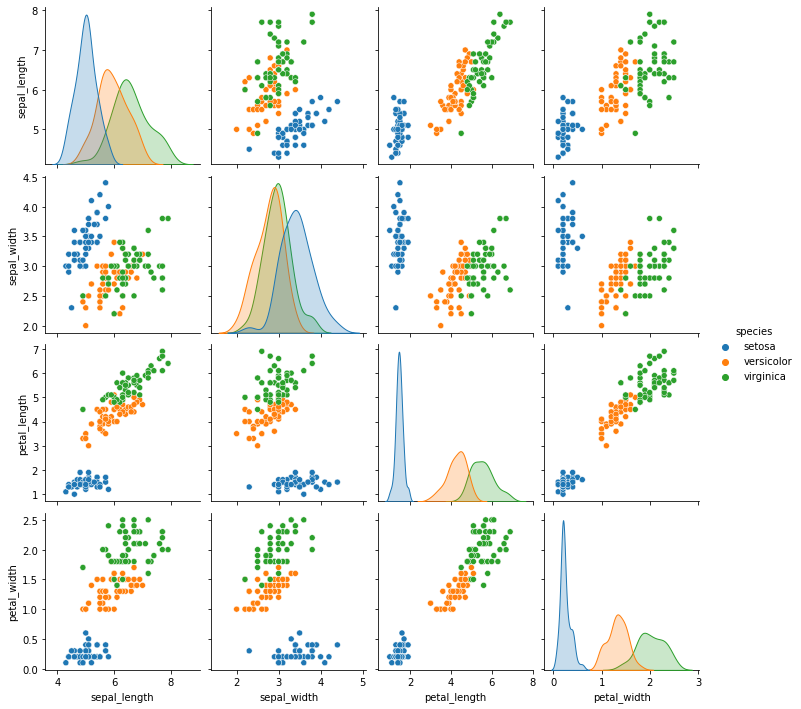

In [7]:
# do yourself - visualize feature space in pairplot
# Beware, it may take few seconds to run! 

sns.pairplot(data=df, hue='species')

Great! What do we see? 

- Is the problem linear? 

- Which class(es) are simply separable and which classes are more difficult? 

- Can you guess what level of noise / uncertainty  is in the data? 

### 4. Data preparation (for Machine Learning modelling / or other analysis)

Boring but extremely importnt step to succeed.

Pandas DataFrame object has attribute `columns`. Use `dataframe.columns` to get the columns / attributes names.

In [10]:
# get the names of out attributes (features)
pass

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# target variable are the species, you can get the column like here: 
df['species']

Prepare two variables: X and y. 

    X .. all features
    y .. target variable to model ( ane later predict) based on the features

In [11]:
target_variable = df['species']
df1 = df.copy()
# remove the 'species' column 
X = df1.drop('species', axis = 1)

In [12]:
# Check the two 
print(X.shape, target_variable.shape)

(150, 4) (150,)


In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
target_variable.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Rarget variable (y) need to be converted to numbers!

In [15]:
# transformation
le = LabelEncoder()
target_variable = le.fit_transform(target_variable) 
target_variable

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# species coding? Which one is which? 
spec_codes  = pd.concat([df['species'], pd.DataFrame(target_variable)], axis=1)

for col in spec_codes:
    print(spec_codes[col].unique())

['setosa' 'versicolor' 'virginica']
[0 1 2]


In [17]:
# now our y is ok
y = target_variable

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Are we ready for modelling?

### 5. Splitting training and testing datasets

Reminder: simple concept to evaluate possible overfittng problem!

In [125]:
# here simple random splitting, you know better ways 
# 90% for training, rest for testing 
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.4, random_state = 42)

print("Training set ", X_train.shape)
print("Testing set ", X_test.shape)

Training set  (90, 4)
Testing set  (60, 4)


### 6. Machine Learning model training

In [126]:
# ctreate instance of the Decition Tree
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state = 42) 

# the hyperparametrs: max. depth, min. samples, splitter are here set by the user to these values
# one can use Grid Search or Random Search techniques to finetune the model 

In [127]:
# fit the model
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42)

In [139]:
# model training cross-validation
cv_tree = cross_validate(tree, X_train, y_train, cv=3, scoring='f1_weighted', return_estimator=True)

In [140]:
print('Prumer vazeneho F1-skore: {:.3f} a std {:.3f}'.format(
        cv_tree['test_score'].mean(),
        cv_tree['test_score'].std())
     )

Prumer vazeneho F1-skore: 0.933 a std 0.027


### 7. Model evaluation

In [131]:
# first run model predictions on separate test set!
y_pred = tree.predict(X_test)

In [132]:
f1_score(y_test, y_pred, average='weighted')

0.9833089133089132

In [141]:
# Overfitted? 

In [144]:
# reminder
for col in spec_codes:
    print(spec_codes[col].unique())

['setosa' 'versicolor' 'virginica']
[0 1 2]


Text(0.5, 1.0, 'F1-score: 0.983')

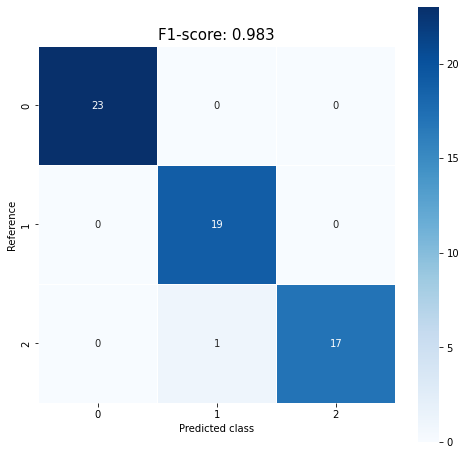

In [145]:
# Confusion matrix?  A bit more interpretable result 
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(8,8))
sns.heatmap(data=cm,linewidths=.5, annot=True, square = True, cmap = 'Blues')
plt.ylabel('Reference')
plt.xlabel('Predicted class')
all_sample_title = 'F1-score: {0}'.format(round(f1_score(y_test, y_pred, average='weighted'), 3))
plt.title(all_sample_title, size = 15)

In [146]:
# Howabout stratified sampling? 
from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

i = 1
for train_index, test_index in kf5.split(X):
    print("Running {} loop".format(i))
    # splitting 
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
        
    # model training
    tree.fit(X_train, y_train) 
    print("Accuracy for fold no. {} on test set: {}".format(i, f1_score(y_test, tree.predict(X_test), average='weighted')))
    i += 1 

Running 1 loop
Accuracy for fold no. 1 on test set: 1.0
Running 2 loop
Accuracy for fold no. 2 on test set: 0.9661782661782662
Running 3 loop
Accuracy for fold no. 3 on test set: 0.9333333333333333
Running 4 loop
Accuracy for fold no. 4 on test set: 0.9002070393374741
Running 5 loop
Accuracy for fold no. 5 on test set: 0.9330808080808081


### 8. Model visualization (interpretable machine learning) 

Remeber Tree-based models are not blackboxes but whiteboxes.

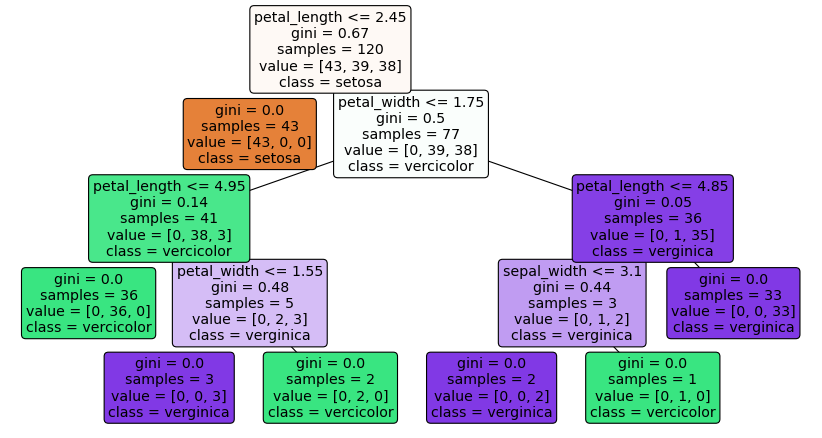

In [147]:
# plot the model 
figure(figsize=(13, 7), dpi=80)
my_decision_tree = plot_tree(decision_tree=tree, feature_names = df1.columns,
class_names =["setosa", "vercicolor", "verginica"] , filled=True ,  precision=2, rounded=True)

More **questions**: 

    - Howabout other ML models? 
    
    - Would be Random Forest more suitable? 
    
    - Would be SVM suitable? 
    
    - Would be Artificial Neural Network suitable? 